# PAQUETE DE OPTIMIZACIÓN CON ALGORITMOS GENÉTICOS
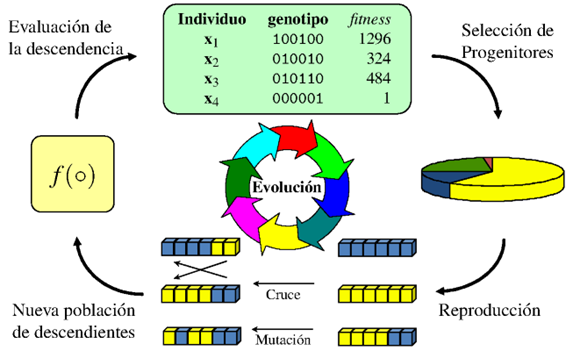

## Paquete de instalación y llamado de librerías

In [2]:
#https://pypi.org/project/geneticalgorithm/#1112-id  
#! pip install geneticalgorithm 
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd

## Definición de la Funcion Objetivo
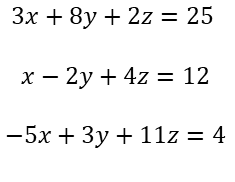


In [3]:
def fitness_ec(genotipo):
  coef=np.array([[3,8,2],[1,-2,4],[-5,3,11]])
  ref=np.array([25,12,4])
  aux=np.matmul(coef,genotipo)
  fit=sum(abs(ref-aux))
  return fit


### Prueba con genotipo ideal

In [4]:
f=fitness_ec([4.643,0.821,2.250])
f

0.005999999999998451

# Parametrización del algoritmo


### Notas
* 'elit_ratio': 0.01 -> 1/100=0.01 Uno de cien  
* 'parents_portion'-> Porción de la población que generará nuevos individuos



## Parametros generales

In [5]:
algorithm_param = {'max_num_iteration': 3000,\
                   'population_size':100,\
                   'mutation_probability':0.5,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.9,\
                   'parents_portion': 0.3,\
                   'crossover_type':'one_point',\
                   'max_iteration_without_improv':None}

## Configuración límites de los alelos y tipo

In [6]:
varbound=np.array([[0,10.0],[0,10.0],[0,10.0]])
vartype=np.array([['real'],['real'],['real']])

##Parametricazión de la función y ejecucion del Modelo

 The best solution found:                                                                           
 [4.65273208 0.8156779  2.25612059]

 Objective function:
 0.050697768357867545


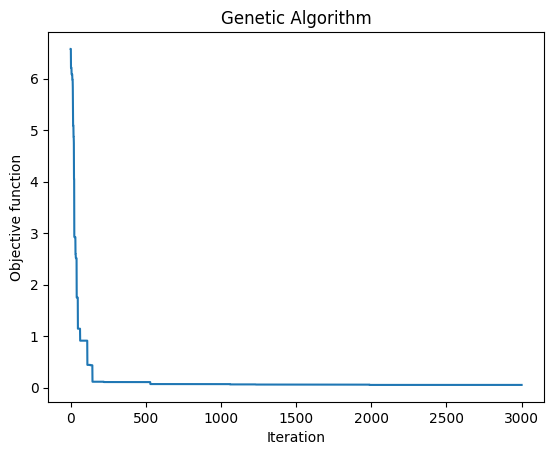

In [7]:
model=ga(function=fitness_ec,\
         dimension=3,\
         variable_type_mixed=vartype,\
         variable_boundaries=varbound,\
         algorithm_parameters=algorithm_param)
model.run()

In [8]:
#print(model.best_variable,2)
#print(model.best_function)
best_geno=[round(alelo,4) for alelo in model.best_variable]
best_geno=np.array(best_geno)
#type(best_geno)

numpy.ndarray

## Representación del Fenotipo

In [9]:
coef=np.array([[3,8,2],[1,-2,4],[-5,3,11]])
ref=np.array([25,12,4])
#x=np.dot(best_geno[0],[1,1,1])
#print(x)
Fenotipo=pd.DataFrame({'a':coef[:,0],'x':np.dot(best_geno[0],[1,1,1]),\
                       'b':coef[:,1],'y':np.dot(best_geno[1],[1,1,1]),\
                       'c':coef[:,2],'z':np.dot(best_geno[2],[1,1,1]),\
                       'ref':ref})
Fenotipo


,a,x,b,y,c,z,ref
0,3,4.6527,8,0.8157,8,2.2561,25
1,1,4.6527,-2,0.8157,-2,2.2561,12
2,-5,4.6527,3,0.8157,3,2.2561,4
